In [2]:
import os
os.chdir('../')
import sys
sys.path.append("./subjects/")

['/home/normenyu/Parfait-ML/jupyter_analysis', '/home/normenyu/anaconda3/lib/python39.zip', '/home/normenyu/anaconda3/lib/python3.9', '/home/normenyu/anaconda3/lib/python3.9/lib-dynload', '', '/home/normenyu/anaconda3/lib/python3.9/site-packages', '/home/normenyu/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg', '/home/normenyu/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/home/normenyu/.ipython', './subjects/', '../', '../']
Each columns's correlation with sex: [ 0.08762275 -0.06577704  0.02684032  0.03427509 -0.38004329 -0.07031842
 -0.16973733 -0.11736268  1.          0.04824349  0.04541514  0.22930915
  0.01338402]
We only care about the magnitude: [0.08762275 0.06577704 0.02684032 0.03427509 0.38004329 0.07031842
 0.16973733 0.11736268 1.         0.04824349 0.04541514 0.22930915
 0.01338402]
In sorted magnitude order: [1.         0.38004329 0.22930915 0.16973733 0.11736268 0.08762275
 0.07031842 0.06577704 0.04824349 0.04541514 0.03427509 0.02684032
 0.

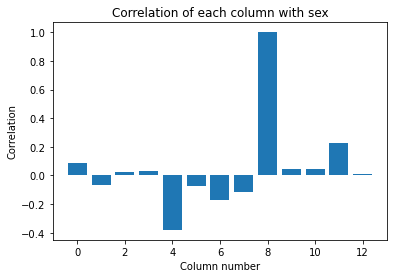

In [3]:
dataset = "census"
sensitive_name = "sex"

if dataset == "census" and (sensitive_name == "sex" or sensitive_name == "gender"):
    sensitive_param = 9
    group_0 = 0  #female
    group_1 = 1  #male
if dataset == "census" and sensitive_name == "race":
    sensitive_param = 8
    group_0 = 0 # white
    group_1 = 4 # black
if dataset == "credit" and (sensitive_name == "sex" or sensitive_name == "gender"):
    sensitive_param = 9
    group_0 = 0  # male
    group_1 = 1  # female
if dataset == "bank" and sensitive_name == "age":  # with 3,5: 0.89; with 2,5: 0.84; with 4,5: 0.05; with 3,4: 0.6
    group_0 = 3
    group_1 = 5
    sensitive_param = 1
if dataset == "compas" and (sensitive_name == "sex" or sensitive_name == "gender"):  # sex
    group_0 = 0 # male
    group_1 = 1 # female
    sensitive_param = 1
if dataset == "compas" and sensitive_name == "age":  # age
    group_0 = 0 # under 25
    group_1 = 2 # greater than 45
    sensitive_param = 2
if dataset == "compas" and sensitive_name == "race":  # race
    group_0 = 0 # non-Caucasian
    group_1 = 1 # Caucasian
    sensitive_param = 3



from sklearn.covariance import EmpiricalCovariance
import sklearn.decomposition
import ast
import sys
import numpy as np
import os
from sklearn.model_selection import train_test_split
import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from adf_data.census import census_data
from adf_data.credit import credit_data
from adf_data.bank import bank_data
from adf_data.compas import compas_data
import pandas as pd
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt

data = {"census":census_data, "credit":credit_data, "bank":bank_data, "compas": compas_data}

X, Y, input_shape, nb_classes = data[dataset]()
X_transformed = StandardScaler().fit_transform(X) # This turns the "covariance" into correlation
Y = np.argmax(Y, axis=1)
cov = EmpiricalCovariance().fit(X_transformed)
print(f"Each columns's correlation with {sensitive_name}: {cov.covariance_[sensitive_param-1]}")

plt.bar(range(len(cov.covariance_[sensitive_param-1])),cov.covariance_[sensitive_param-1])
plt.title(f"Correlation of each column with {sensitive_name}")
plt.xlabel(f"Column number")
plt.ylabel(f"Correlation")

correlation_magnitude = np.abs(cov.covariance_[sensitive_param-1])
print(f"We only care about the magnitude: {correlation_magnitude}")

sorted_correlation = np.sort(correlation_magnitude)[::-1]
print(f"In sorted magnitude order: {sorted_correlation}")

### Histograms to demonstrate 
From the numbers, it seems that column 4 is of special interest since its covariance is the largest.

The largest is always itself, so we will start from second largest. 

In [102]:
def plot_hist_nth_largest(n):
    largest_correlation_index = np.where(correlation_magnitude == sorted_correlation[n])[0][0]
    plt.hist([X[:,largest_correlation_index][(X[:,sensitive_param-1]==group_0)],X[:,largest_correlation_index][(X[:,sensitive_param-1]==group_1)]], bins = 20, color=["blue", "pink"],label=["male", "female"])
    plt.title(f"{sensitive_name} v.s. column {largest_correlation_index}")
    plt.xlabel(f"Column {largest_correlation_index} value")
    plt.ylabel("Count of data in this value")

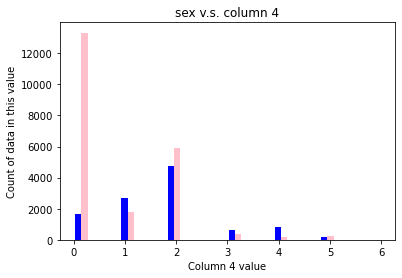

In [103]:
plot_hist_nth_largest(1)

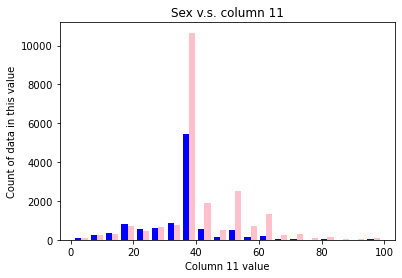

In [82]:
plot_hist_nth_largest(2)

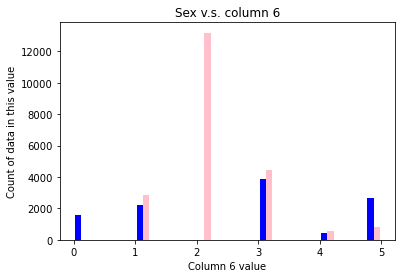

In [83]:
plot_hist_nth_largest(3)

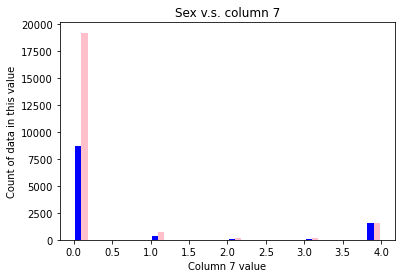

In [84]:
plot_hist_nth_largest(4)

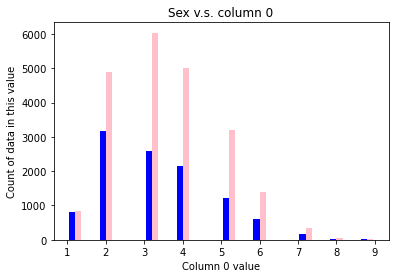

In [85]:
plot_hist_nth_largest(5)

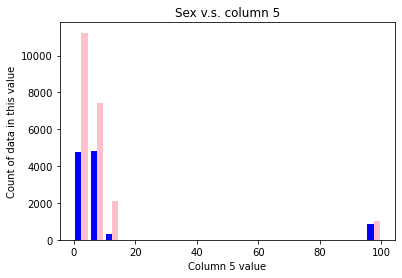

In [86]:
plot_hist_nth_largest(6)

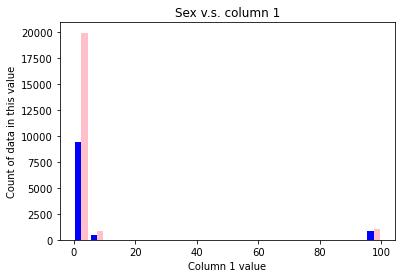

In [87]:
plot_hist_nth_largest(7)

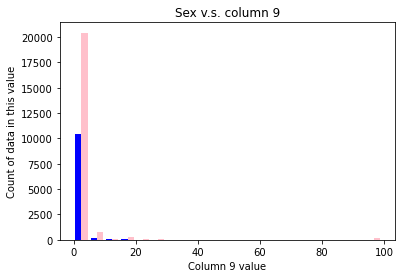

In [88]:
plot_hist_nth_largest(8)

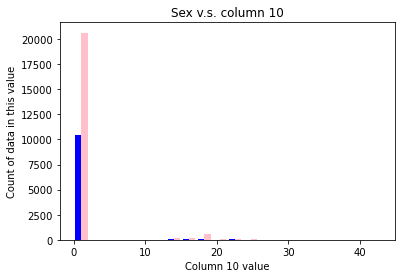

In [89]:
plot_hist_nth_largest(9)